In [1]:


import pickle
import numpy as np
#from neuronunit.tests.dynamics import CVTest, LocalVariationTest
!pip install pyspike

import pyspike
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyspike as spk
'''

with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:
  mdf1 = pickle.load(f)


with open('pickles/membrane_dynamics_file.p', 'rb') as f:
  mdf0 = pickle.load(f)
  print(mdf0)
'''
#print(mdf1)
import pyspike as spk
with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:

  #with open('pickles/membrane_dynamics_file.p', 'rb') as f:
  mdf1 = pickle.load(f)#http://0.0.0.0:8888/notebooks/BluePyOpt/Spike_Analysis.ipynb#
  print(mdf1)
vm_size = mdf1.size['analogsignals']
print(mdf1)


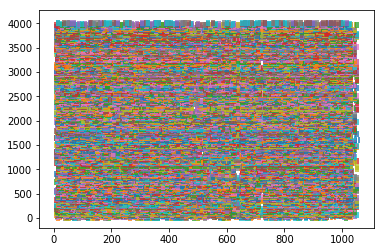

In [2]:
vm_size = mdf1.size['analogsignals']
train_size = mdf1.size['spiketrains']

print(mdf1)
# first load the data, interval ending time = 4000, start=0 (default)
#spike_trains_txt = spk.load_spike_trains_from_txt("PySpike_testdata.txt", 4000)

spike_trains = []

ass = mdf1.analogsignals[0]   
vm_spiking = []
for spiketrain in mdf1.spiketrains:
    vm_spiking.append(mdf1.analogsignals[0][spiketrain.annotations['source_id']])
    #spiketrain = mdf1.spiketrains[index]
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
    
    # argument edges is the time interval you want to be considered.
    pspikes = pyspike.SpikeTrain(spiketrain,edges=(0,len(ass)))
    spike_trains.append(pspikes)

tstop = len(vm_spiking[0])

# plot the spike times
for (i, spike_train) in enumerate(spike_trains):
    plt.scatter(spike_train, i*np.ones_like(spike_train), marker='|')

# profile of the first two spike trains
f = spk.isi_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()



In [3]:
#print(tstop)
#print(mdf1.analogsignals[0][0][0])
#print(dir(mdf1))
#print(mdf1.t_start)
#print(mdf1.t_stop)

In [4]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
!pip install ipyvolume

#import ipyvolume.pylab as p3
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA()


mpl.rcParams.update({'font.size':16})

# A function for plotting 3-dimensional data
def plot3d(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*data.T)
    minn,maxx = data.min(),data.max()
    ax.set_xlim(minn,maxx)
    ax.set_ylim(minn,maxx)
    ax.set_zlim(minn,maxx)
    
def plot3d_live(data):
    fig = p3.figure()
    q = p3.scatter(*data.T, size=1, marker="sphere")
    p3.style.use("dark") # looks better
    p3.show()
    
# A function for summarizing covariancs and correlations
def summarize(info,name,quiet=False):
    values = info[name]
    if not quiet:
        print(values.round(2))
    plt.pcolor(values,cmap='RdBu_r',vmin=-values.max(),vmax=values.max())
    raynge = np.arange(values.shape[0])
    if not quiet:
        plt.xticks(raynge+0.5,raynge)
        plt.yticks(raynge+0.5,raynge)
    else:
        plt.xticks([])
        plt.yticks([])
    plt.gca().invert_yaxis() # Make y-axis go from low to high like a matrix
    plt.colorbar().set_label(name)
    eigenvalues,_ = np.linalg.eig(info[name])
    if not quiet:
        for i,eig in enumerate(sorted(eigenvalues,reverse=True)):
            print('Eigenvalue #%d is %.3g' % (i+1,eig))
        
def report_mean_var(data):
    for i in range(data.shape[1]):
        column = data[:,i]
        print("Dimension %d has mean %.2g and variance %.3g" % \
              (i+1,column.mean(),column.var()))

    100% |████████████████████████████████| 1.1MB 605kB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 3.9MB/s ta 0:00:011    44% |██████████████▍                 | 30kB 10.6MB/s eta 0:00:01
    100% |████████████████████████████████| 276kB 1.9MB/s eta 0:00:01
    100% |████████████████████████████████| 2.2MB 554kB/s ta 0:00:011
    100% |████████████████████████████████| 112kB 4.5MB/s ta 0:00:01
    100% |████████████████████████████████| 8.0MB 87kB/s eta 0:00:011
  Running setup.py bdist_wheel for ipyvolume ... - \ | done
  Stored in directory: /home/jovyan/.cache/pip/wheels/3b/85/82/a5e0fbf3e3e63ef21f842fc7bd5f617efa3c6f67f95be57aa2
  Running setup.py bdist_wheel for ipywebrtc ... - done
  Stored in directory: /home/jovyan/.cache/pip/wheels/0d/ab/1d/f0d85517f6196a5bcc0b182e2c36a243c84cda1578ee211f7a
  Running setup.py bdist_wheel for olefile ... - done
  Stored in directory: /home/jovyan/.cache/pip/wheels/75/f2/18/9f073aab5b308aaccec50c17d4afb33dffc3265254e

In [5]:

i = 0
slices = []
vm_size = mdf1.size['analogsignals']

vm_spiking = []
for spiketrain in mdf1.spiketrains:
    #vm = [float(i) for i in mdf1.analogsignals[0][spiketrain.annotations['source_id']]]
    vm = mdf1.analogsignals[0][spiketrain.annotations['source_id']]

    vm_spiking.append(vm)

print(len(vm_spiking))
df = pd.DataFrame(vm_spiking, index=['Observation %d' % (i+1) for i in range(0,len(vm_spiking))]) 

#df = df.replace((), np.nan)
#df = df.replace(df,np.nan).dropna()
                  # Replace the expression above with your something that loads or creates your data 
                  # and puts it into the variable df
#df.head()
#df


4000


In [ ]:

n_components = min(df.shape[0],df.shape[1])
df_transformed = df.copy()
if df.shape[0] < df.shape[1]: # If there are fewer observations than dimensions
    df_transformed = df_transformed.iloc[:,:df.shape[0]] # Than the transformed dimensions must be reduced to that number
df_transformed.columns = ['PC %d' % (i+1) for i in range(n_components)]
df_transformed[:] = PCA(n_components=3).fit(df.values)

#df_transformed[:] = pca.fit_transform(df.values)
df_transformed.head()

#data_rotated = np.dot(df_transformed,df.T).T


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 3991,PC 3992,PC 3993,PC 3994,PC 3995,PC 3996,PC 3997,PC 3998,PC 3999,PC 4000
Observation 1,"PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...",...,"PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon..."
Observation 2,"PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...",...,"PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon..."
Observation 3,"PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...",...,"PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon..."
Observation 4,"PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...",...,"PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon...","PCA(copy=True, iterated_power='auto', n_compon.

In [ ]:
#plot3d(mdf1)
#data = mdf1.analogsignals[0]
#data = spike_trains
data = np.array(vm_spiking)
report_mean_var(data)
pca.fit(data)
pca = PCA(n_components=3).fit(data.T.values)
data_rotated = np.dot(pca.components_,data.T).T
report_mean_var(data_rotated)

Dimension 1 has mean -60 and variance 0.018
Dimension 2 has mean -58 and variance 5.67
Dimension 3 has mean -58 and variance 4.38
Dimension 4 has mean -60 and variance 0.168
Dimension 5 has mean -60 and variance 0.288
Dimension 6 has mean -60 and variance 0.779
Dimension 7 has mean -60 and variance 0.18
Dimension 8 has mean -57 and variance 6.95
Dimension 9 has mean -58 and variance 5.49
Dimension 10 has mean -58 and variance 6.75
Dimension 11 has mean -60 and variance 1.37
Dimension 12 has mean -58 and variance 8.07
Dimension 13 has mean -60 and variance 0.529
Dimension 14 has mean -60 and variance 1.82
Dimension 15 has mean -60 and variance 1.93
Dimension 16 has mean -60 and variance 0.489
Dimension 17 has mean -58 and variance 5.94
Dimension 18 has mean -60 and variance 0.172
Dimension 19 has mean -58 and variance 4.63
Dimension 20 has mean -60 and variance 0.172
Dimension 21 has mean -58 and variance 6.82
Dimension 22 has mean -60 and variance 1.19
Dimension 23 has mean -60 and var

In [ ]:
plt.figure()
for vm in data_rotated:
    plt.plot(times, vm)
plt.show()

In [ ]:
print('plot the analog signal Block/Segment to get information about its length and sampling rate')
print(mdf1.analogsignals)
ass = mdf1.analogsignals[0][143]    
sf = 10 * 1/0.001
dt = float(1.0/sf)
times = np.linspace(0.0,5.0001,len(vm_spiking[0]))

plt.figure()
for vm in vm_spiking:
    plt.plot(times, vm)
plt.show()



In [ ]:


from scipy.signal import periodogram
dt = 0.0025
frequencies, power = periodogram(vm_spiking[144],fs=1/dt)

def plot_periodogram(frequencies,power):
    plt.figure(figsize=(10,4))
    plt.plot(frequencies,power)
    plt.xlabel('Frequency ($Hz$)')
    plt.ylabel('Power ($V^2/Hz$)') # Note that power is now 
                                   # a normalized density
plot_periodogram(frequencies,power)



In [ ]:

#dt = 0.01 # 1 ms interval between points
T_max = len(vm_spiking[144]) # Signal lasts for 10 seconds
times = np.arange(0,T_max,dt)
N = len(times)
frequency = 20 # Frequency of sinusoid in Hz
offset = 0 # Phase offset in radians
signal = np.array(0.6*np.sin(2*np.pi*frequency*times+offset))

composite_signal = [ float(vm) + signal[i] for i,vm in enumerate(vm_spiking[144])]


plt.figure()
plt.plot(times[0:1000], composite_signal[0:1000])
plt.show()

frequencies, power = periodogram(composite_signal,fs=1/dt)

plot_periodogram(frequencies,power)

In [ ]:
#from 